# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Ali Essonni*
* *Enrico Benedettini*
* *Youssef Amine*
* *Mak Fazlic*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
import epidemics_helper
import networkx as nx
from networkx.readwrite import json_graph
import json
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.connectivity import EdgeComponentAuxGraph

In [43]:
# Simulating an epidemic with the following parameters
# start node = 23654
# beta = 10
# gamma = 0.1

# First importing the json data and creating a graph from it
G = nx.Graph()
data = {}
with open('../data/nyc_augmented_network.json') as json_file:
    data = json.load(json_file)

edges = data['links']
edges = [(edge['source'], edge['target']) for edge in edges]
G.add_edges_from(edges)

coord = data['nodes']
coord = [c['coordinates'] for c in coord]

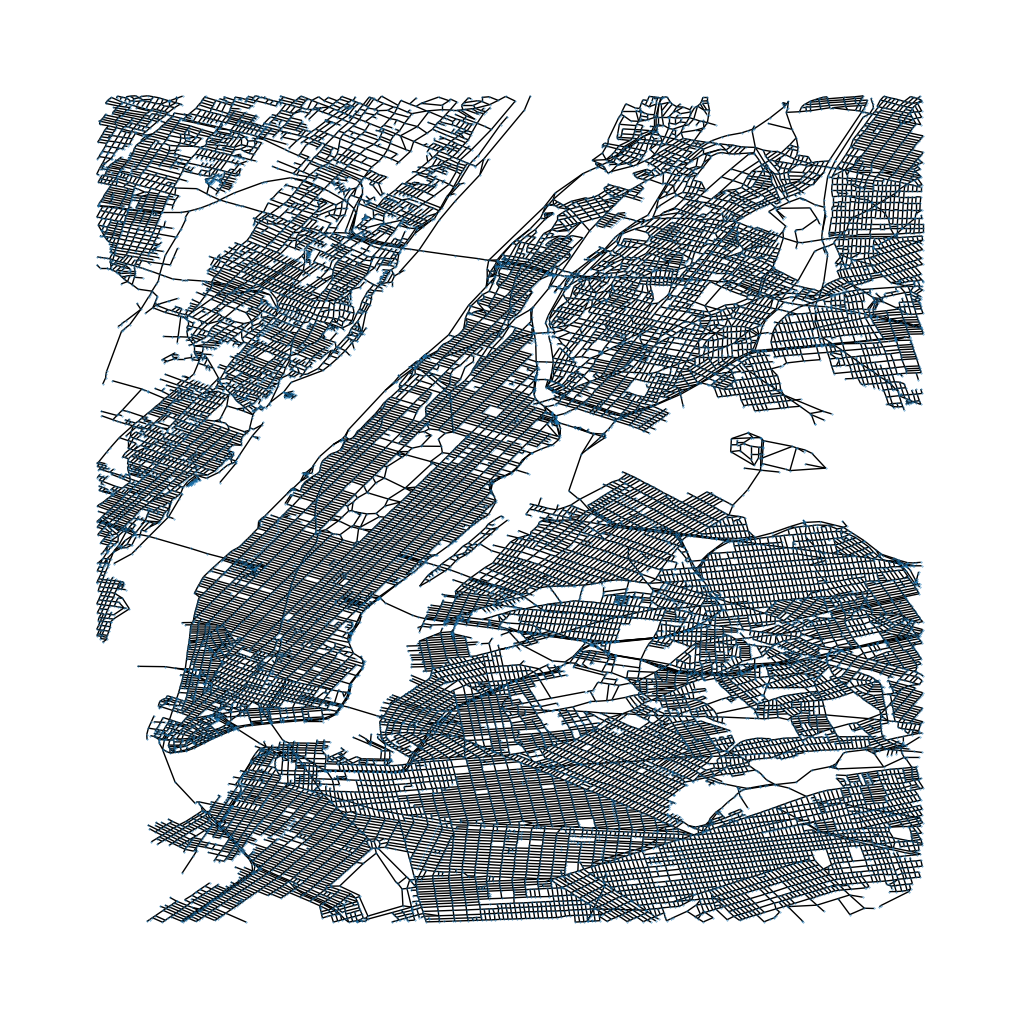

In [44]:
# Now we draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1)
plt.show()

In [45]:
# Simulating the epidemic propagation through the graph
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100)

Epidemic stopped after 101.37 days | 101.37 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


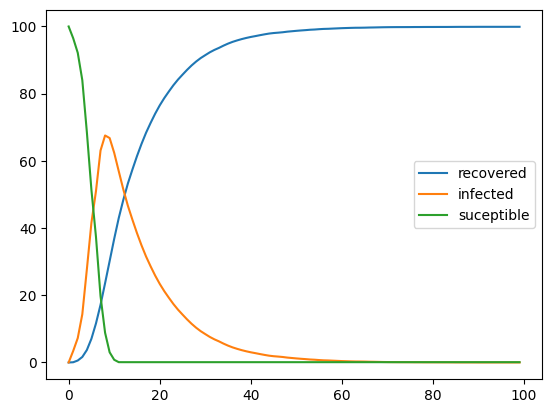

In [47]:
# infection_times is a numpy array of the time of infection of each node (the node id is the index)
# recover_times is a numpy array of the time of recovery of each node (the node id is the index)
infection_times = sir.inf_time
recover_times = sir.rec_time

# count the number of recovered nodes at each time step
recovered = np.zeros(100)
infected = np.zeros(100)
suceptible = np.zeros(100)

for i in range(100):
    recovered[i] = np.count_nonzero(recover_times <= i)
    infected[i] = np.count_nonzero(infection_times <= i) - recovered[i]
    suceptible[i] = len(G.nodes()) - infected[i] - recovered[i]

recovered = (recovered / len(G.nodes())) * 100
infected = (infected / len(G.nodes())) * 100
suceptible = (suceptible / len(G.nodes())) * 100

# plotting the percentage of suceptible, infected and recovered nodes at each time step
plt.plot(recovered, label="recovered")
plt.plot(infected, label="infected")
plt.plot(suceptible, label="suceptible")
plt.legend()
plt.show()

In [48]:
# Time at which 60% of the population is infected at the same time
x = np.where(infected >= 60)[0][0]
print("Time at which 60% of the population is infected at the same time: day", x)

# Time at which 60% of the population is either infected or recovered
y = np.where((infected + recovered) >= 60)[0][0]
print("Time at which 60% of the population is either infected or recovered: day", y)

Time at which 60% of the population is infected at the same time: day 7
Time at which 60% of the population is either infected or recovered: day 6


In [49]:
def nodes_color(G, sir, day):
    colors = []
    for node in G.nodes:
        status = sir.get_node_status(node, day)
        colors.append("green" if status == 0 else "red" if status == 1 else "blue")
    return colors

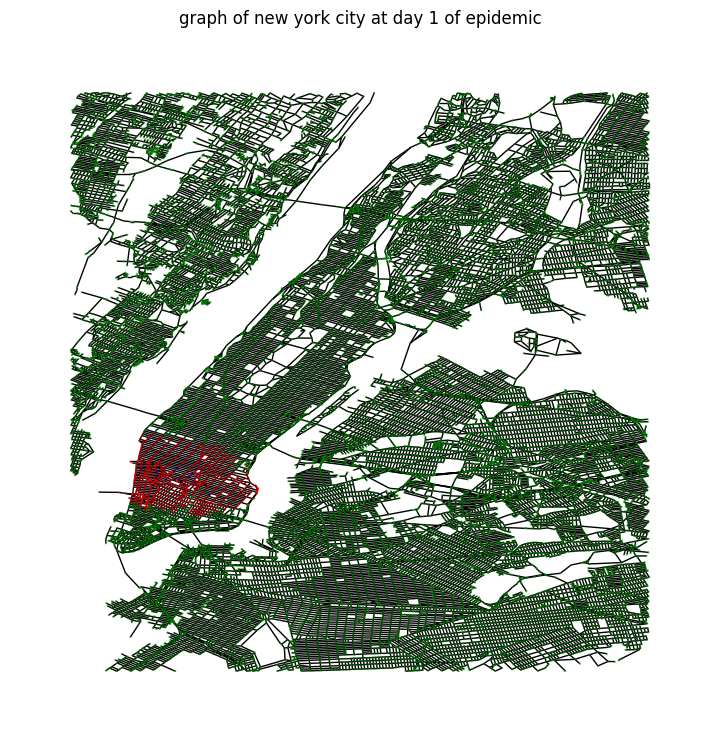

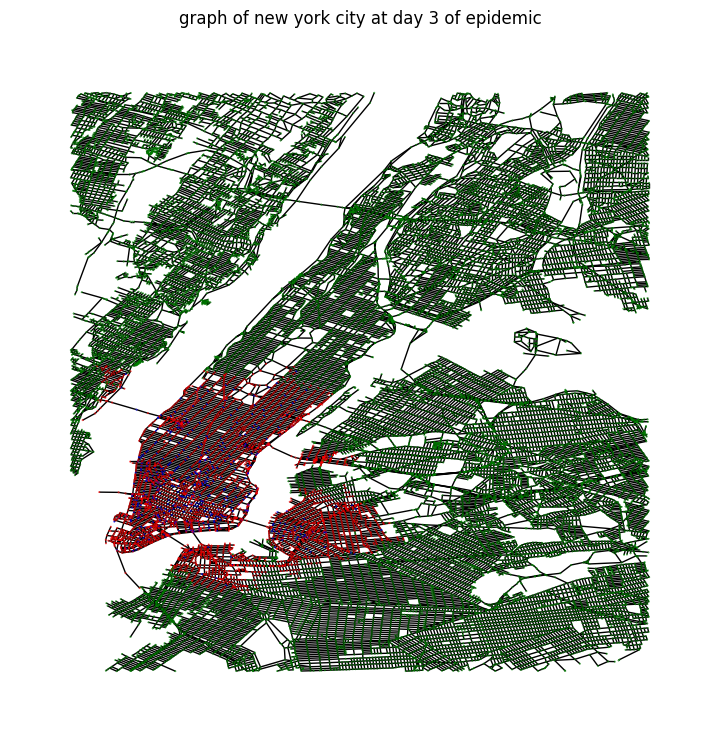

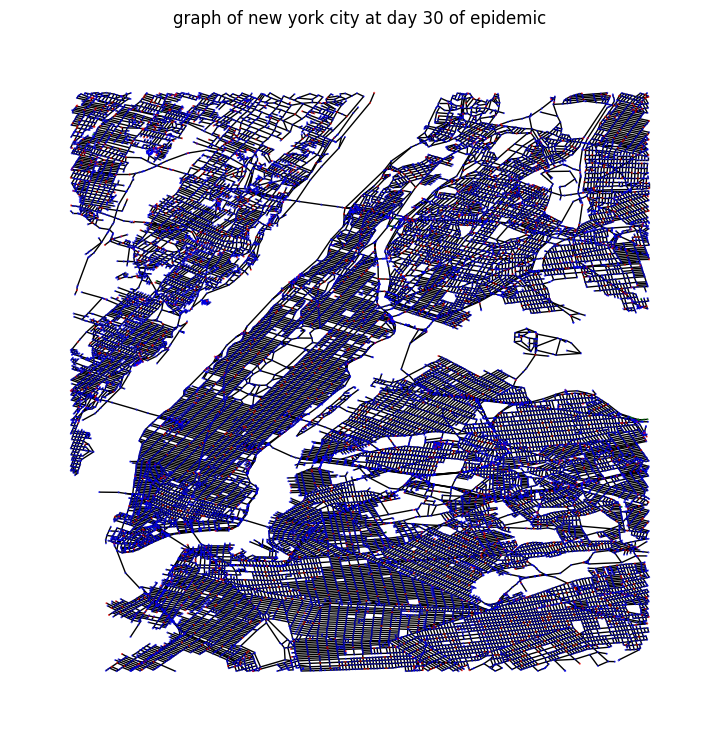

In [56]:
colors_1 = nodes_color(G, sir, 1)
colors_3 = nodes_color(G, sir, 3)
colors_30 = nodes_color(G, sir, 30)

# draw the graph G with the color map colors_30 with the title "graph of new york city at day 30 of epidemic"
plt.figure(figsize=(7, 7))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1, node_color=colors_1)
plt.title("graph of new york city at day 1 of epidemic")
plt.figure(figsize=(7, 7))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1, node_color=colors_3)
plt.title("graph of new york city at day 3 of epidemic")
plt.figure(figsize=(7, 7))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1, node_color=colors_30)
plt.title("graph of new york city at day 30 of epidemic")
plt.show()


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [63]:
# removing uniformly at random n edges from the graph
def graph_with_less_edges(G, n):
    """
    :param G: a networkx graph
    :param n: the number of edges to remove
    :return: a new graph with n edges removed
    """
    y  = np.random.randint(0, high=len(G.edges), size=n)
    z = np.array(G.edges)[y]
    H = G.copy()
    H.remove_edges_from(z)
    return H

In [64]:
# Hepler method to compute the statistics of the simulation at day 30
def simulation_statistics(G, sim, n):
    """
    :param G: the graph
    :param sim: the simulation
    :param n: the number of edges removed from the graph
    :return: prints the number of infected, recovered and suceptible nodes at day 30
    """
    recoveredG = np.zeros(100)
    infectedG = np.zeros(100)
    suceptibleG = np.zeros(100)
    for i in range(100):
        recoveredG[i] = np.count_nonzero(sim.rec_time <= i)
        infectedG[i] = np.count_nonzero(sim.inf_time <= i) - recoveredG[i]
        suceptibleG[i] = len(G.nodes()) - infectedG[i] - recoveredG[i]

    # print the number of infected, recovered and suceptible nodes at day 30
    print("Statistics for the graph with ", n, " edges removed uniformly at random")
    print("Number of infected nodes at day 30: ", (infectedG[30]/len(G.nodes())) * 100, "%")
    print("Number of recovered nodes at day 30: ", (recoveredG[30]/len(G.nodes())) * 100, "%")
    print("Number of suceptible nodes at day 30: ", (suceptibleG[30]/len(G.nodes())) * 100, "%")

In [66]:
# Sampling 1000 edges uniformly at random and removing them from the graph
H1 = graph_with_less_edges(G, 1000)
H2 = graph_with_less_edges(G, 10000)

# instantiating an sir model
sir1 = epidemics_helper.SimulationSIR(H1, beta=10.0, gamma=0.1)
source1 = np.random.randint(0, high=len(G.nodes))
sir1.launch_epidemic(source=source1, max_time=100)

sir2 = epidemics_helper.SimulationSIR(H2, beta=10.0, gamma=0.1)
source2 = np.random.randint(0, high=len(G.nodes))
sir2.launch_epidemic(source=source2, max_time=100)

# Printing the statistics for the graph with 1000 removed edges
simulation_statistics(H1, sir1, 1000)
print("-----------------------------")
# Printing the statistics for the graph with 10000 removed edges
simulation_statistics(H2, sir2, 10000)



Epidemic stopped after 103.65 days | 103.65 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 97.41 days | 97.41 days elapsed | 24.0% susceptible, 0.0% infected, 76.0% recovered
Statistics for the graph with  1000  edges removed uniformly at random
Number of infected nodes at day 30:  10.509421849628035 %
Number of recovered nodes at day 30:  88.95434462444771 %
Number of suceptible nodes at day 30:  0.5362335259242476 %
-----------------------------
Statistics for the graph with  10000  edges removed uniformly at random
Number of infected nodes at day 30:  10.381027906801103 %
Number of recovered nodes at day 30:  65.586647029946 %
Number of suceptible nodes at day 30:  24.032325063252898 %


#### Exercise 2.11: Strategy 2

In [21]:
# Maybe we should disconnect nodes based on local bridges and node degree
H4 = G.copy()

# find local bridges in H4 using networkx method
local_bridges = list(nx.local_bridges(H4))


here is 1


In [57]:
# sorting the bridges by degree of their nodes in descending order and remove the first 2500 from the graph
local_bridges = sorted(local_bridges, key=lambda x: H4.degree(x[0]), reverse=True)
z = local_bridges[:2500]
H4.remove_edges_from(z)

# starting new simulation
sir4 = epidemics_helper.SimulationSIR(H4, beta=10.0, gamma=0.1, verbose=False)

Text(0.5, 1.0, 'graph of new york city with 2500 local bridges removed')

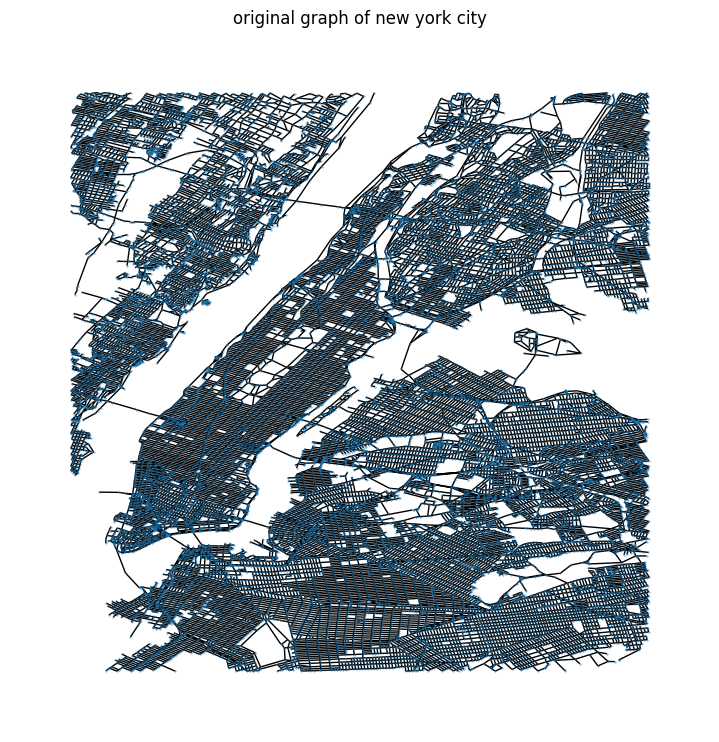

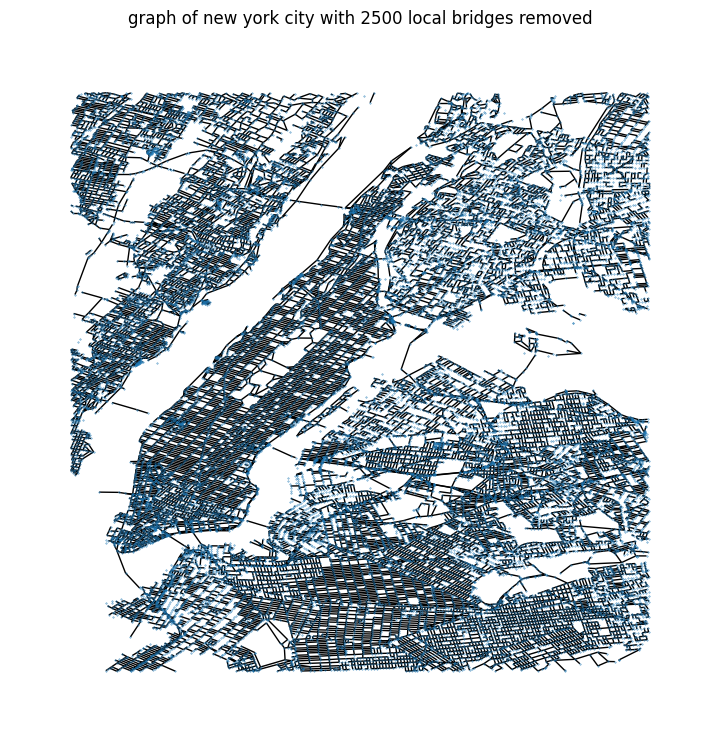

In [68]:
plt.figure(figsize=(7, 7))
nx.draw(G, pos=coord, with_labels=False, node_size=0.1)
plt.title("original graph of new york city")

plt.figure(figsize=(7, 7))
nx.draw(H4, pos=coord, with_labels=False, node_size=0.1)
plt.title("graph of new york city with 2500 local bridges removed")

In [59]:
# helper method to compute the statistics of the simulation at day 30
def simulation_statistics2(G, sim, n):
    """
    :param G: the graph
    :param sim: the simulation
    :param n: the number of edges removed from the graph
    :return: prints the number of infected, recovered and suceptible nodes at day 30
    """
    suceptibleG = np.zeros(100)
    for i in range(100):
        sim.launch_epidemic(source=np.random.randint(0, high=len(G.nodes)-1), max_time=100)
        state_at_30 = []
        for j in list(G.nodes()):
            state_at_30.append(sim.get_node_status(j, 30))
        suceptibleG[i] = (state_at_30.count(0)*100)/len(G.nodes())

    # print the number of infected, recovered and suceptible nodes at day 30
    print("Statistics for the graph with ", n, " edges removed based on local bridges and degree of nodes")
    print("Average number of suceptible nodes at day 30: ", np.mean(suceptibleG))

In [60]:
simulation_statistics2(H4, sir4, 2500)

Statistics for the graph with  2500  edges removed based on local bridges and degree of nodes
Average number of suceptible nodes at day 30:  86.46002794456403
